C:\Users\dbahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: 2, DB Index: 2.08, Silhouette Score: 0.16
Clusters: 3, DB Index: 1.81, Silhouette Score: 0.19
Clusters: 4, DB Index: 1.42, Silhouette Score: 0.30
Clusters: 5, DB Index: 1.31, Silhouette Score: 0.30
Clusters: 6, DB Index: 1.35, Silhouette Score: 0.29
Clusters: 7, DB Index: 1.36, Silhouette Score: 0.28
Clusters: 8, DB Index: 1.39, Silhouette Score: 0.26
Clusters: 9, DB Index: 1.38, Silhouette Score: 0.24


C:\Users\dbahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dbahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dbahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Clusters: 10, DB Index: 1.34, Silhouette Score: 0.24
Optimal number of clusters: 5


C:\Users\dbahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


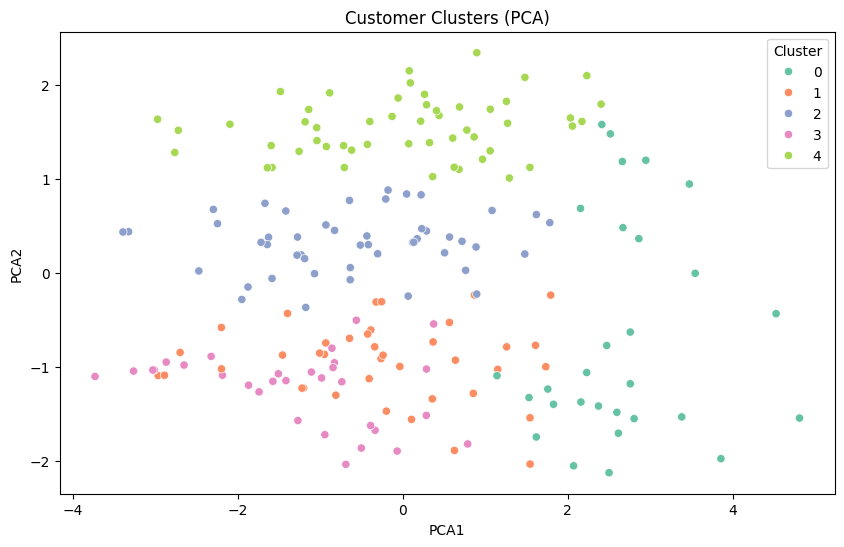

Optimal Clusters: 5
DB Index for optimal clusters: 1.31


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

total_spending = merged_data.groupby("CustomerID")["TotalValue"].sum()
transaction_count = merged_data.groupby("CustomerID")["TransactionID"].nunique()
product_categories = pd.get_dummies(merged_data[["CustomerID", "Category"]], columns=["Category"])
category_features = product_categories.groupby("CustomerID").sum()
region_features = pd.get_dummies(customers.set_index("CustomerID")["Region"])

customer_profile = pd.concat([total_spending, transaction_count, category_features, region_features], axis=1).fillna(0)
customer_profile.columns = ["TotalSpending", "TransactionCount"] + list(category_features.columns) + list(region_features.columns)

scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile)

db_scores = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_profile_scaled)
    
    db_score = davies_bouldin_score(customer_profile_scaled, labels)
    silhouette_avg = silhouette_score(customer_profile_scaled, labels)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Clusters: {k}, DB Index: {db_score:.2f}, Silhouette Score: {silhouette_avg:.2f}")

optimal_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans.fit_predict(customer_profile_scaled)
customer_profile["Cluster"] = final_labels

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_profile_scaled)
customer_profile["PCA1"] = reduced_data[:, 0]
customer_profile["PCA2"] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=customer_profile, palette="Set2")
plt.title("Customer Clusters (PCA)")
plt.show()

customer_profile.reset_index(inplace=True)
customer_profile[["CustomerID", "Cluster", "PCA1", "PCA2"]].to_csv("Customer_Clusters.csv", index=False)

metrics = pd.DataFrame({
    "Clusters": k_range,
    "DB Index": db_scores,
    "Silhouette Score": silhouette_scores
})
metrics.to_csv("Clustering_Metrics.csv", index=False)

print(f"Optimal Clusters: {optimal_k}")
print(f"DB Index for optimal clusters: {db_scores[np.argmin(db_scores)]:.2f}")


PDF report generated: Dhruv_Baheti_Clustering.pdf


'Dhruv_Baheti_Clustering.pdf'

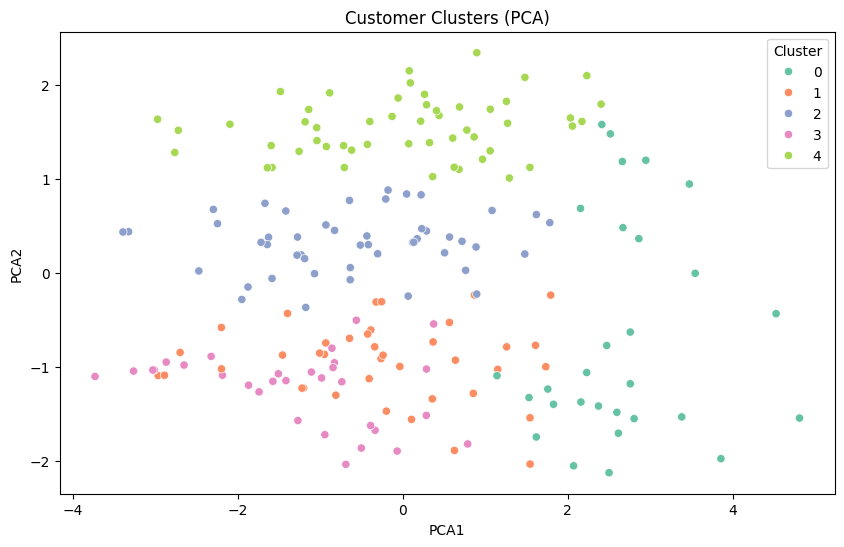

In [3]:
from fpdf import FPDF

def generate_clustering_report(optimal_k, db_index, silhouette_avg, metrics_file, clusters_file, plot_file):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font('Arial', 'B', 16)
    pdf.cell(0, 10, 'Clustering Results Report', ln=True, align='C')
    pdf.ln(10)

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, f"Number of Clusters Formed: {optimal_k}", ln=True)
    pdf.cell(0, 10, f"Davies-Bouldin Index (DB): {db_index:.2f}", ln=True)
    pdf.cell(0, 10, f"Silhouette Score: {silhouette_avg:.2f}", ln=True)
    pdf.ln(10)

    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Clustering Metrics:', ln=True)
    pdf.set_font('Arial', '', 12)
    pdf.ln(5)

    metrics = pd.read_csv(metrics_file)
    for index, row in metrics.iterrows():
        pdf.cell(0, 10, f"Clusters: {row['Clusters']} | DB Index: {row['DB Index']:.2f} | Silhouette Score: {row['Silhouette Score']:.2f}", ln=True)

    pdf.ln(10)

    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Cluster Visualization:', ln=True)
    pdf.ln(5)
    pdf.image(plot_file, x=40, y=pdf.get_y(), w=130)
    pdf.ln(85)
    
    report_file = "Dhruv_Baheti_Clustering.pdf"
    pdf.output(report_file)
    print(f"PDF report generated: {report_file}")
    return report_file

optimal_k = k_range[np.argmin(db_scores)] 
db_index = db_scores[np.argmin(db_scores)]  
silhouette_avg = silhouette_scores[np.argmin(db_scores)]  
metrics_file = "Clustering_Metrics.csv"
clusters_file = "Customer_Clusters.csv"
plot_file = "cluster_plot.png" 

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=customer_profile, palette="Set2")
plt.title("Customer Clusters (PCA)")
plt.savefig(plot_file)

generate_clustering_report(optimal_k, db_index, silhouette_avg, metrics_file, clusters_file, plot_file)